In [35]:
import json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define your provided code functions

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def find_shared_tiles_and_agreement(labeler_data, threshold):
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    total_common_tiles = len(common_tiles)
    agreed_tiles = 0
    common_tile_labels = {}

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            label = data[tile][first_image]['label']
            tile_labels.append(label)
        common_tile_labels[tile] = tile_labels
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        if most_common_count >= threshold:
            agreed_tiles += 1
    
    agreement_percentage = (agreed_tiles / total_common_tiles) * 100 if total_common_tiles > 0 else 0
    print(f"\nTotal common tiles: {total_common_tiles}")
    print(f"Number of tiles where at least {threshold} labelers agree: {agreed_tiles}")
    print(f"Percentage of agreement: {agreement_percentage:.2f}%")
    
    return common_tile_labels

def process_labeler_files(file_paths, threshold):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data, threshold)
    return labeler_data, common_tile_labels



Total common tiles: 99
Number of tiles where at least 5 labelers agree: 60
Percentage of agreement: 60.61%


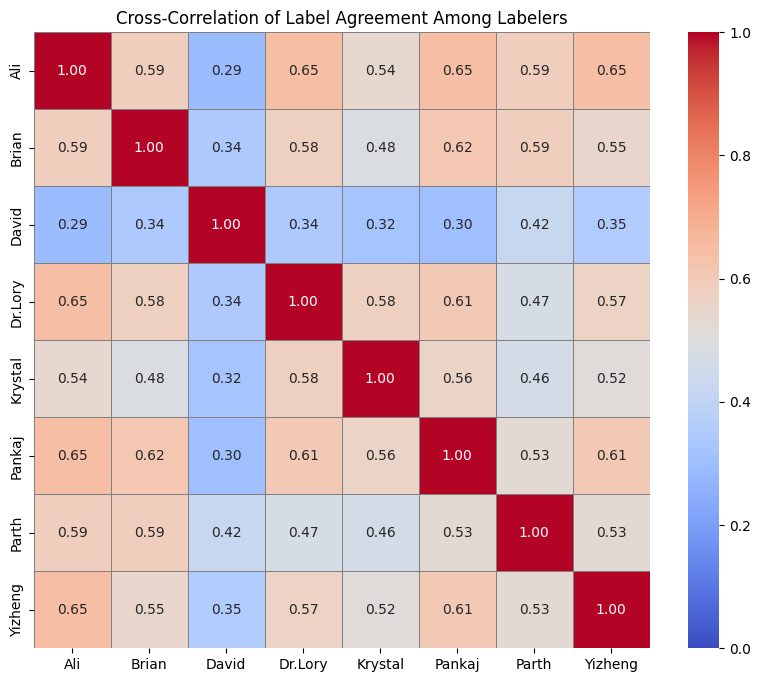

In [36]:
# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']
threshold = 5  # Set an example threshold

# Process files to get labeler data and shared tile labels
labeler_data, common_tile_labels = process_labeler_files(file_paths, threshold)

# Prepare data for cross-correlation analysis
labeler_names = list(labeler_data.keys())
num_labelers = len(labeler_names)
correlation_matrix = np.zeros((num_labelers, num_labelers))

# Calculate cross-correlation between labelers
for i, labeler1 in enumerate(labeler_names):
    for j, labeler2 in enumerate(labeler_names):
        if i == j:
            correlation_matrix[i, j] = 1.0  # Perfect correlation with oneself
        else:
            agreement_count = sum(1 for tile in common_tile_labels 
                                  if common_tile_labels[tile][i] == common_tile_labels[tile][j])
            correlation_matrix[i, j] = agreement_count / len(common_tile_labels)

# Create a DataFrame for easier handling in visualization
correlation_df = pd.DataFrame(correlation_matrix, index=labeler_names, columns=labeler_names)

# Plot the cross-correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', fmt=".2f",vmin=0, vmax=1)
plt.title("Cross-Correlation of Label Agreement Among Labelers")
# plt.savefig('CC_raw.png')
plt.show()



Total common tiles: 99
Number of tiles where at least 6 labelers agree: 77
Percentage of agreement: 77.78%


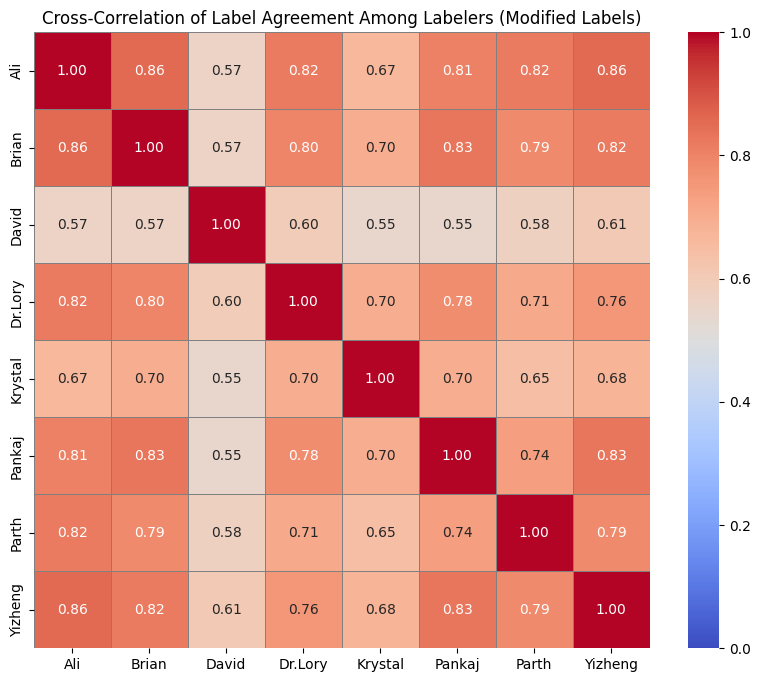

In [33]:
import json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define your provided code functions with an added transformation step

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def transform_labels(label):
    # Transform specific labels as requested
    if label == '3':
        return '4'
    elif label == '1':
        return '0'
    else:
        return label

def find_shared_tiles_and_agreement(labeler_data, threshold):
    # Find common tiles and apply transformation
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    total_common_tiles = len(common_tiles)
    agreed_tiles = 0
    common_tile_labels = {}

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            # Apply label transformation here
            label = transform_labels(data[tile][first_image]['label'])
            tile_labels.append(label)
        common_tile_labels[tile] = tile_labels
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        if most_common_count >= threshold:
            agreed_tiles += 1
    
    agreement_percentage = (agreed_tiles / total_common_tiles) * 100 if total_common_tiles > 0 else 0
    print(f"\nTotal common tiles: {total_common_tiles}")
    print(f"Number of tiles where at least {threshold} labelers agree: {agreed_tiles}")
    print(f"Percentage of agreement: {agreement_percentage:.2f}%")
    
    return common_tile_labels

def process_labeler_files(file_paths, threshold):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    # Apply label transformation to common tiles
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data, threshold)
    return labeler_data, common_tile_labels

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']
threshold = 6  # Set an example threshold

# Process files to get labeler data and transformed shared tile labels
labeler_data, common_tile_labels = process_labeler_files(file_paths, threshold)

# Prepare data for cross-correlation analysis
labeler_names = list(labeler_data.keys())
num_labelers = len(labeler_names)
correlation_matrix = np.zeros((num_labelers, num_labelers))

# Calculate cross-correlation between labelers using transformed labels
for i, labeler1 in enumerate(labeler_names):
    for j, labeler2 in enumerate(labeler_names):
        if i == j:
            correlation_matrix[i, j] = 1  # Perfect correlation with oneself
        else:
            # Count the transformed label matches for cross-correlation
            agreement_count = sum(1 for tile in common_tile_labels 
                                  if transform_labels(common_tile_labels[tile][i]) == transform_labels(common_tile_labels[tile][j]))
            correlation_matrix[i, j] = agreement_count / len(common_tile_labels) if len(common_tile_labels) > 0 else 0

# Create a DataFrame for easier handling in visualization
correlation_df = pd.DataFrame(correlation_matrix, index=labeler_names, columns=labeler_names)

# Plot the cross-correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', fmt=".2f",vmin=0, vmax=1)
plt.title("Cross-Correlation of Label Agreement Among Labelers (Modified Labels)")
# plt.savefig('CC_tol.png')
plt.show()



In [38]:
import json
from collections import Counter, defaultdict
import pandas as pd

# Define the helper functions
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def transform_labels(label):
    if label == '3':
        return '4'
    elif label == '1':
        return '0'
    else:
        return label

def calculate_agreement(labeler_data, threshold, use_transformed_labels=False):
    # Find common tiles across all labelers
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    agreed_tiles = 0

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            # Optionally transform labels if specified
            label = data[tile][first_image]['label']
            if use_transformed_labels:
                label = transform_labels(label)
            tile_labels.append(label)
        
        # Count the frequency of each label
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]

        # Check if the most common label meets the threshold for agreement
        if most_common_count >= threshold:
            agreed_tiles += 1

    return f'{((agreed_tiles / len(common_tiles))*100):.2f}'

def process_labeler_files(file_paths):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    return labeler_data

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']

# Process files to get labeler data
labeler_data = process_labeler_files(file_paths)

# Initialize a list to store agreement results
agreement_results = []

# Calculate agreement for thresholds from 2 to 8
for threshold in range(2, 9):
    # Agreement without transformation
    original_agreement = calculate_agreement(labeler_data, threshold, use_transformed_labels=False)
    # Agreement with transformation
    transformed_agreement = calculate_agreement(labeler_data, threshold, use_transformed_labels=True)
    # Append results to the list
    agreement_results.append({
        "Number of Labelers Threshold": threshold,
        "Agreement (Original Labels)": original_agreement,
        "Agreement (Transformed Labels)": transformed_agreement
    })

# Convert the list of results into a DataFrame
agreement_table = pd.DataFrame(agreement_results)
agreement_table.set_index("Number of Labelers Threshold", inplace=True)

# Display the results table
display(agreement_table)


,Agreement (Original Labels),Agreement (Transformed Labels)
Number of Labelers Threshold,,
2,100.00,100.00
3,97.98,100.00
4,75.76,96.97
5,59.60,83.84
6,38.38,71.72
7,25.25,45.45
8,0.00,0.00



Total common tiles: 99
Number of tiles where at least 5 labelers agree: 60
Percentage of agreement: 60.61%


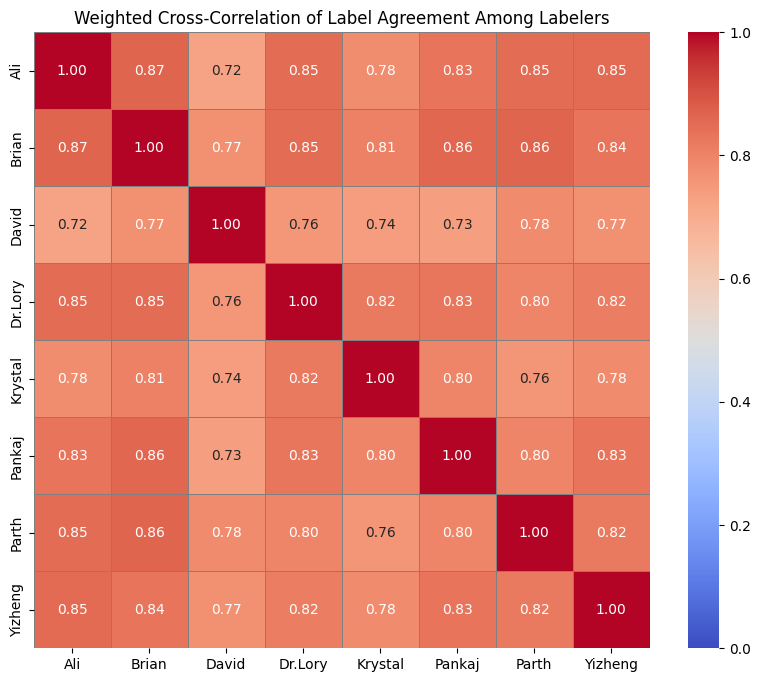

In [37]:
import json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define your provided code functions

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def label_similarity(label1, label2):
    # Similarity function based on absolute difference
    # return 1 / (1 + abs(int(label1) - int(label2)))
    S = 1 - (abs(int(label1) - int(label2))/4)

    return S

def find_shared_tiles_and_agreement(labeler_data, threshold):
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    total_common_tiles = len(common_tiles)
    agreed_tiles = 0
    common_tile_labels = {}

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            label = data[tile][first_image]['label']
            tile_labels.append(label)
        common_tile_labels[tile] = tile_labels
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        if most_common_count >= threshold:
            agreed_tiles += 1
    
    agreement_percentage = (agreed_tiles / total_common_tiles) * 100 if total_common_tiles > 0 else 0
    print(f"\nTotal common tiles: {total_common_tiles}")
    print(f"Number of tiles where at least {threshold} labelers agree: {agreed_tiles}")
    print(f"Percentage of agreement: {agreement_percentage:.2f}%")
    
    return common_tile_labels

def process_labeler_files(file_paths, threshold):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data, threshold)
    return labeler_data, common_tile_labels

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']
threshold = 5  # Set an example threshold

# Process files to get labeler data and shared tile labels
labeler_data, common_tile_labels = process_labeler_files(file_paths, threshold)

# Prepare data for weighted cross-correlation analysis
labeler_names = list(labeler_data.keys())
num_labelers = len(labeler_names)
correlation_matrix = np.zeros((num_labelers, num_labelers))

# Calculate weighted cross-correlation between labelers
for i, labeler1 in enumerate(labeler_names):
    for j, labeler2 in enumerate(labeler_names):
        if i == j:
            correlation_matrix[i, j] = 1  # Perfect correlation with oneself
        else:
            similarity_scores = []
            for tile in common_tile_labels:
                label1 = common_tile_labels[tile][i]
                label2 = common_tile_labels[tile][j]
                # Calculate similarity between the labels and add to list
                similarity_scores.append(label_similarity(label1, label2))
            
            # Calculate average similarity for this pair of labelers
            correlation_matrix[i, j] = np.mean(similarity_scores) if similarity_scores else 0

# Create a DataFrame for easier handling in visualization
correlation_df = pd.DataFrame(correlation_matrix, index=labeler_names, columns=labeler_names)

# Plot the weighted cross-correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', fmt=".2f",vmin=0, vmax=1)
plt.title("Weighted Cross-Correlation of Label Agreement Among Labelers")
# plt.savefig('WCC.png')
plt.show()


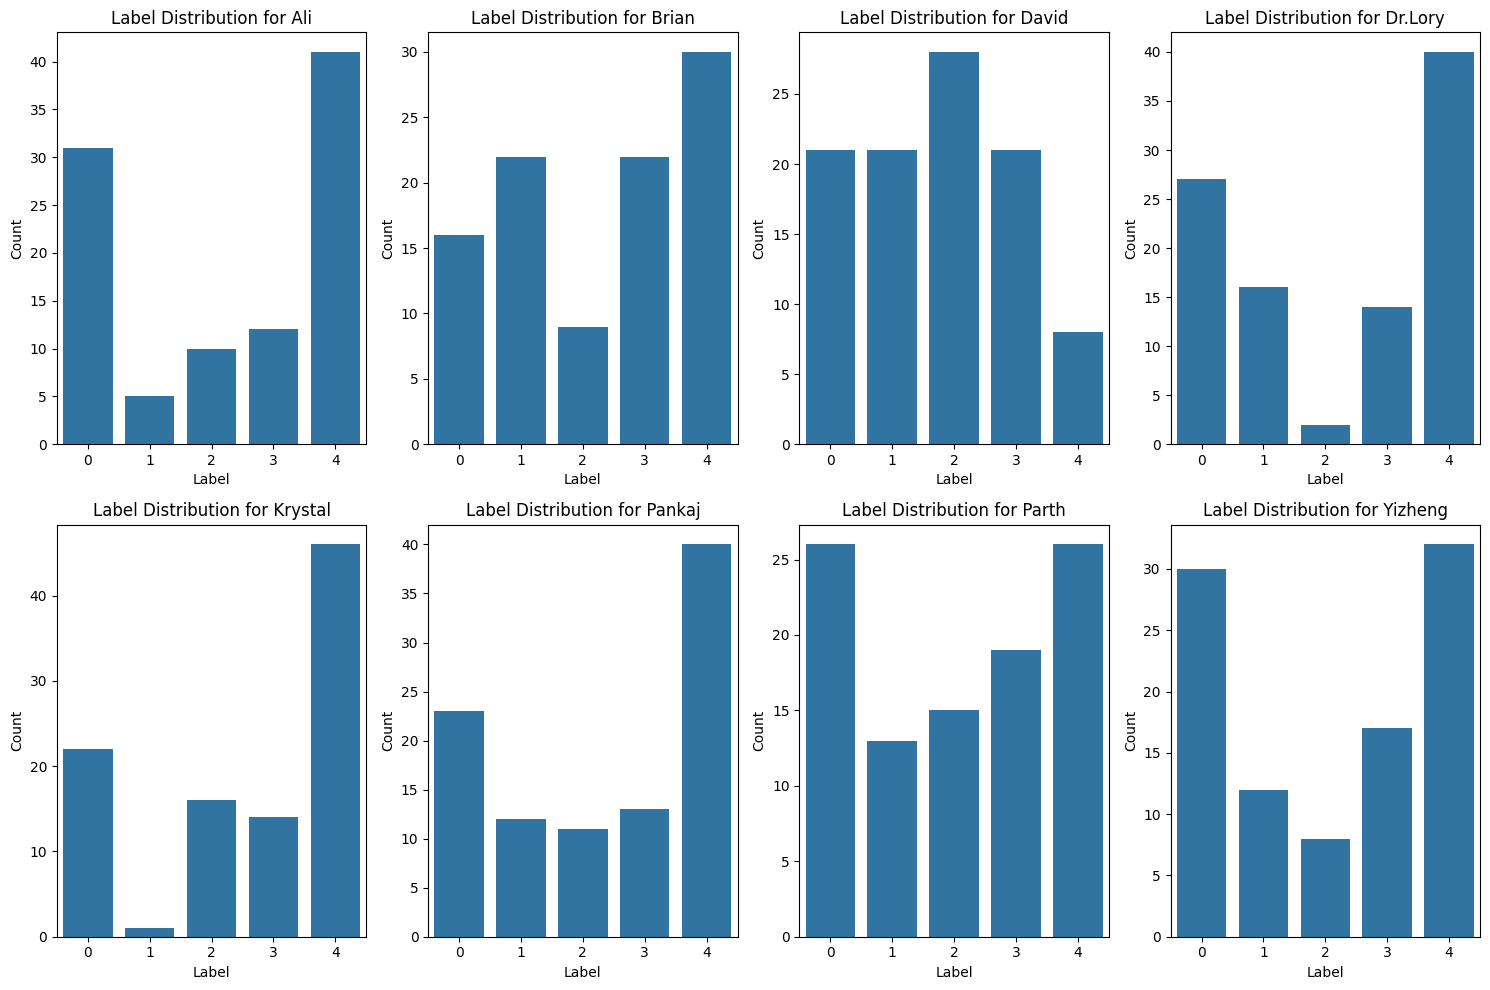

In [60]:
import json
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Load JSON files as before
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def find_shared_tiles_and_agreement(labeler_data):
    # Find common tiles across all labelers
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    common_tile_labels = {labeler: [] for labeler in labeler_data.keys()}
    
    # Collect labels for each common tile by each labeler
    for tile in common_tiles:
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            label = data[tile][first_image]['label']
            common_tile_labels[labeler].append(label)
    
    return common_tile_labels

def process_labeler_files(file_paths):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data)
    return common_tile_labels

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']

# Process files to get the label data for common tiles
common_tile_labels = process_labeler_files(file_paths)

# Set the categorical order for labels (ensures same order for all plots)
label_order = [0, 1, 2, 3, 4]

# Plot histograms for each labeler
plt.figure(figsize=(15, 10))

for i, (labeler, labels) in enumerate(common_tile_labels.items()):
    plt.subplot(2, (len(common_tile_labels) + 1) // 2, i + 1)
    # Convert to DataFrame with a categorical type for consistent ordering
    df = pd.DataFrame({'Label': labels})
    # df['Label'] = pd.Categorical(df['Label'], categories=label_order, ordered=True)
    # Plot with seaborn countplot
    sns.countplot(data=df, x='Label', order=label_order)
    plt.title(f"Label Distribution for {labeler}")
    plt.xlabel("Label")
    plt.ylabel("Count")

plt.tight_layout()
# plt.savefig('label_hists.png')
plt.show()


In [65]:
import json
from collections import Counter, defaultdict


def transform_labels(label):
    if label == '3':
        return '4'
    elif label == '1':
        return '0'
    else:
        return label


# Load JSON files as before
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def categorize_tiles(labeler_data):
    # Find common and uncommon tiles
    all_tiles = set(tile for data in labeler_data.values() for tile in data.keys())
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    uncommon_tiles = all_tiles - common_tiles
    
    tile_agreement_dict = []

    # Process common tiles
    for tile in common_tiles:
        tile_labels = []
        labeler_by_label = defaultdict(list)
        
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            label = data[tile][first_image]['label']
            tile_labels.append(label)
            labeler_by_label[label].append(labeler)
        
        # Count occurrences of each label for the tile
        label_count = Counter(tile_labels)

        # Check for labels agreed upon by more than 6 labelers
        for label, count in label_count.items():
            if count >= 6:
                tile_agreement_dict.append({
                    "tile_number": tile,
                    "label": label,
                    "labelers": labeler_by_label[label]
                })
                break  # Skip to the next tile if we find a label with more than 6 agreements

    # Process uncommon tiles
    for tile in uncommon_tiles:
        tile_labels = []
        labeler_by_label = defaultdict(list)
        
        for labeler, data in labeler_data.items():
            if tile in data:
                first_image = next(iter(data[tile]))
                label = data[tile][first_image]['label']
                tile_labels.append(label)
                labeler_by_label[label].append(labeler)
        
        # Count occurrences of each label for the tile
        label_count = Counter(tile_labels)

        # Check for labels agreed upon by exactly 2 labelers
        for label, count in label_count.items():
            if count == 2:
                tile_agreement_dict.append({
                    "tile_number": tile,
                    "label": label,
                    "labelers": labeler_by_label[label]
                })
                break  # Store only the first label with exactly 2 agreements

    return tile_agreement_dict

def process_labeler_files(file_paths):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    tile_agreement_dict = categorize_tiles(labeler_data)
    return tile_agreement_dict

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']

# Process files and get the dictionary of tiles with agreements
tile_agreement_dict = process_labeler_files(file_paths)

# Display the result
for entry in tile_agreement_dict:
    print(f"Tile Number: {entry['tile_number']}, Label: {entry['label']}, Labelers: {entry['labelers']}")


Tile Number: 1085, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 1050, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 883, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 681, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 795, Label: 0, Labelers: ['Ali', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth']
Tile Number: 721, Label: 4, Labelers: ['Ali', 'Brian', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 885, Label: 4, Labelers: ['Ali', 'Brian', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 632, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 647, Label: 4, Labelers: ['Ali', 'Brian', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
T

In [70]:
import json
from collections import Counter, defaultdict

# Load JSON files as before
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def transform_label(label):
    # Apply transformation with toleration
    if label == '1':
        return '0'
    elif label == '3':
        return '4'
    return label

def categorize_tiles_with_toleration(labeler_data):
    # Find common and uncommon tiles
    all_tiles = set(tile for data in labeler_data.values() for tile in data.keys())
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    uncommon_tiles = all_tiles - common_tiles
    
    tile_agreement_dict = []

    # Process common tiles
    for tile in common_tiles:
        tile_labels = []
        labeler_by_label = defaultdict(list)
        
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            # Transform label according to toleration rules
            label = transform_label(data[tile][first_image]['label'])
            tile_labels.append(label)
            labeler_by_label[label].append(labeler)
        
        # Count occurrences of each label for the tile
        label_count = Counter(tile_labels)

        # Check for labels agreed upon by more than 6 labelers
        for label, count in label_count.items():
            if count >= 6:
                tile_agreement_dict.append({
                    "tile_number": tile,
                    "label": label,
                    "labelers": labeler_by_label[label]
                })
                break  # Skip to the next tile if we find a label with more than 6 agreements

    # Process uncommon tiles
    for tile in uncommon_tiles:
        tile_labels = []
        labeler_by_label = defaultdict(list)
        
        for labeler, data in labeler_data.items():
            if tile in data:
                first_image = next(iter(data[tile]))
                # Transform label according to toleration rules
                label = transform_label(data[tile][first_image]['label'])
                tile_labels.append(label)
                labeler_by_label[label].append(labeler)
        
        # Count occurrences of each label for the tile
        label_count = Counter(tile_labels)

        # Check for labels agreed upon by exactly 2 labelers
        for label, count in label_count.items():
            if count == 2:
                tile_agreement_dict.append({
                    "tile_number": tile,
                    "label": label,
                    "labelers": labeler_by_label[label]
                })
                break  # Store only the first label with exactly 2 agreements

    return tile_agreement_dict

def process_labeler_files_with_toleration(file_paths):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    tile_agreement_dict = categorize_tiles_with_toleration(labeler_data)
    return tile_agreement_dict

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']

# Process files and get the dictionary of tiles with agreements after transformation
tile_agreement_dict = process_labeler_files_with_toleration(file_paths)

# Display the result
for entry in tile_agreement_dict:
    print(f"Tile Number: {entry['tile_number']}, Label: {entry['label']}, Labelers: {entry['labelers']}")


Tile Number: 1085, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 1050, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 883, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 850, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 681, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 387, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Pankaj', 'Yizheng']
Tile Number: 795, Label: 0, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 721, Label: 4, Labelers: ['Ali', 'Brian', 'David', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizheng']
Tile Number: 885, Label: 4, Labelers: ['Ali', 'Brian', 'Dr.Lory', 'Krystal', 'Pankaj', 'Parth', 'Yizh

In [72]:
tile_label_agreement_tol = tile_agreement_dict

In [77]:
tile_agreement_dict_without_2 = []

for entry in tile_label_agreement_tol:

    if entry['label'] != '2':

        tile_agreement_dict_without_2.append({
                    "tile_number": entry['tile_number'],
                    "label": entry['label'],
                    "labelers": entry['labelers']
                })

In [78]:
len(tile_agreement_dict_without_2)

621

In [81]:
import json

data_dict = {entry["tile_number"]: {"label": entry["label"], "labelers": entry["labelers"]} for entry in tile_agreement_dict_without_2}

# Save to JSON file
with open('GT_L6_Tol.json', 'w') as json_file:
    json.dump(data_dict, json_file, indent=4)

In [85]:
with open('GT_L6_Tol.json', 'r') as json_file:
    data_dict = json.load(json_file)

# Initialize counters
count_4 = 0
count_0 = 0

# Iterate over the data to count labels
for tile_info in data_dict.values():
    label = tile_info["label"]
    if label == '4':
        count_4 += 1
    elif label == '0':
        count_0 += 1

# Print the results
print(f"Number of tiles with label 4: {count_4}")
print(f"Number of tiles with label 0: {count_0}")

Number of tiles with label 4: 354
Number of tiles with label 0: 267
